# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Removing the unwanted column

In [4]:
df = df.drop(['Loan_ID'], axis=1)

# Checking the details of table

In [5]:
# The numbers of rows and columns in the dataset.
df.shape

(381, 12)

In [6]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


# Handling the missing values in the dataset

In [7]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# filling the null values of Gender with the mode value and if there are multiple mode then iloc[0] will fill the missing value with the first mode.
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0]) 

# filling the null values of Self_Employed with mode:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])

# filling the null values of Self_Employed with mode and converting the datatype of the column to int:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0])

# filling the null values of Credit_History with mode and converting the datatype of the column to int:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])

#converting the string representations of Dependents with equivalent numerics
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])

# filling the null values of Dependents with mode:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

In [9]:
# Rechecking if all the missing values are replaced
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis (EDA)

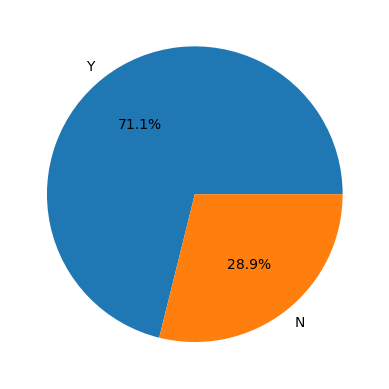

In [10]:
# plotting the piechart for LoanStatus column.

temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

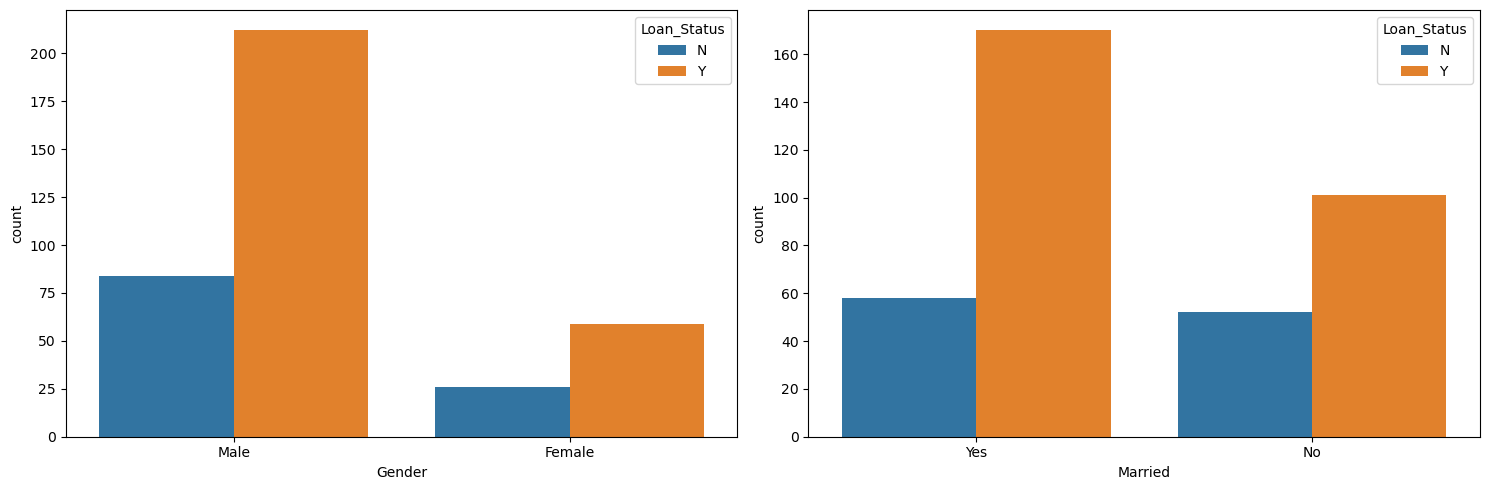

In [11]:
plt.subplots(figsize=(15, 5))
for i,col in enumerate(['Gender','Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df,x=col,hue='Loan_Status')
plt.tight_layout()
plt.show()

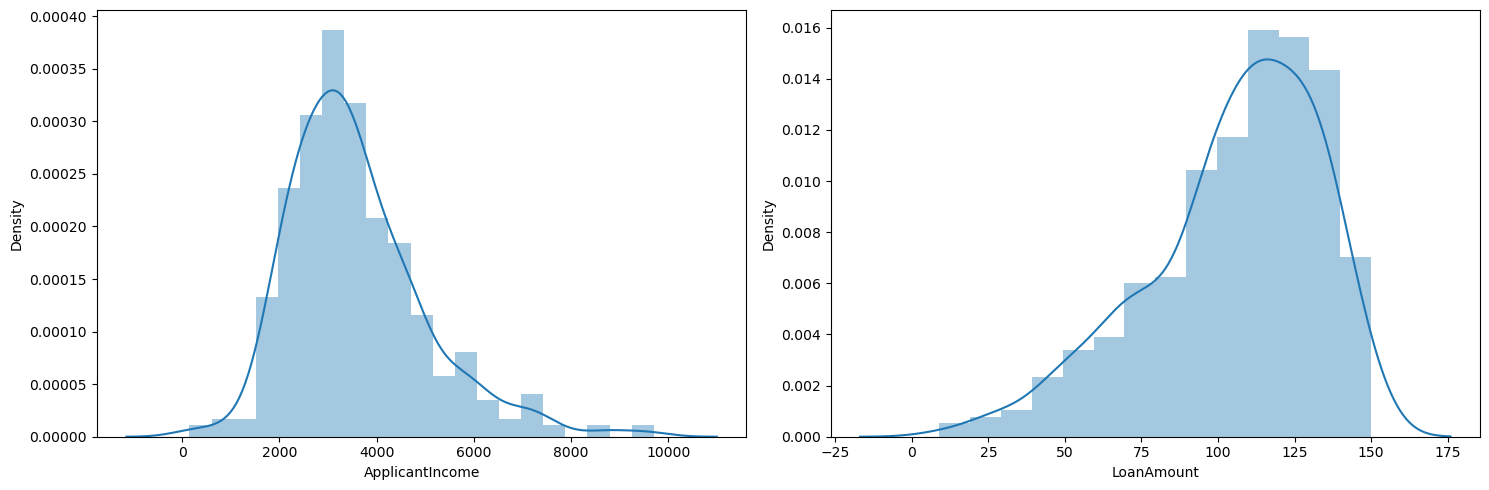

In [12]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.275381  104.986877
std        1419.813818        2340.818114   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


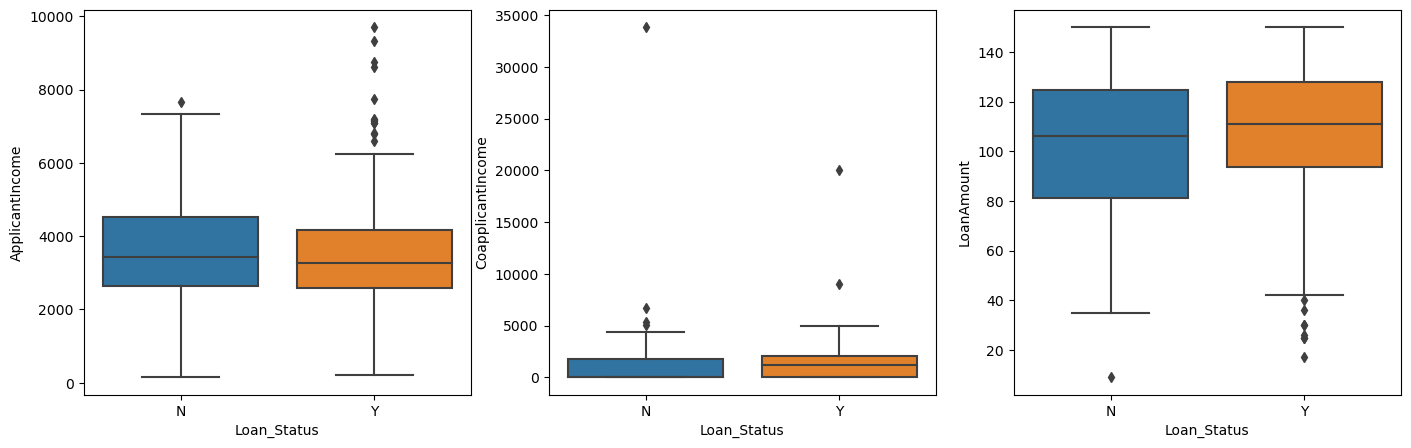

In [13]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [14]:
# There are some extreme outlier’s in the data we need to remove them. 
df = df[df['ApplicantIncome'] < 8500]
df = df[df['LoanAmount'] > 20]

# Let’s see the mean amount of the loan granted to males as well as females. For that, we will use groupby() method.

In [15]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female    102.650602
Male      106.119863
Name: LoanAmount, dtype: float64

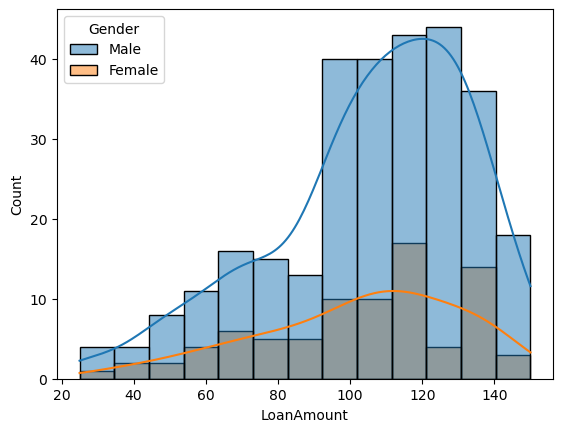

In [16]:
# Histogram
sns.histplot(data=df, x='LoanAmount', hue='Gender', kde=True)
plt.show()

In [17]:
df.groupby(['Married', 'Gender'])['LoanAmount'].mean()

Married  Gender
No       Female     98.333333
         Male      101.670330
Yes      Female    113.913043
         Male      108.134328
Name: LoanAmount, dtype: float64

# Converting categorical data into numerical form

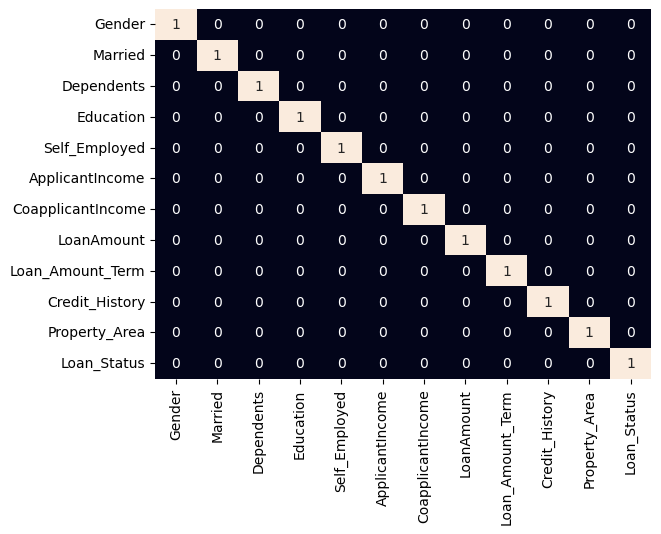

In [18]:
from sklearn.preprocessing import LabelEncoder

# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col]=le.fit_transform(data[col])
    return data
 
# Applying function in whole column
df = encode_labels(df)
 
# Generating Heatmap
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3.0,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0.0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1


# Preprocessing Data

In [21]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [22]:
X.shape, y.shape

((375, 11), (375,))

# Splitting dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 11), (300,), (75, 11), (75,))

# Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model - DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [27]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

# Testing Part

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 86.67%
Roc Score: 74.12%


In [31]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,9,9,18
1,1,56,57
All,10,65,75


In [32]:
import pickle

In [33]:
import gradio as gr
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [34]:
with open("Loan_Eligibility.pkl","wb") as f:
    pickle.dump(model,f)

In [35]:
with open("Loan_application.pkl","rb") as f:
    model= pickle.load(f)

In [36]:
def make_prediction(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
    with open("Loan_application.pkl","rb") as f:
        model=pickle.load(f)
        preds=model.predict([[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]])
    if preds==1:
            return "You are eligible for the loan"
    return "You are not eligible for the loan"

In [37]:
#Create the input component for Gradio since

Gender_input=gr.Number(label = "Enter the Gender of the Individual {1 for Male and 0 for Female}")
Married_input =gr.Number(label= "Enter your Marital Status {1 for Yes and 0 for No}")
Dependents_input=gr.Number(label = "Enter the number of Dependents")
Education_input= gr.Number(label = "Enter your Education Status {0 for Graduate and 1 for Not Graduate")
Self_Employed_input=gr.Number(label= "Enter whether you are Self-Employed {1 for Yes or 0 for No}")
ApplicantIncome_input=gr.Number(label="Enter your Income")
CoapplicantIncome_input=gr.Number(label="Enter Co-applicant's Income")
LoanAmount_input=gr.Number(label="Enter the required Loan Amount")
Loan_Amount_Term_input=gr.Number(label="Enter the Loan Tenure")
Credit_History_input=gr.Number(label="Enter the number of Credit History")
Property_Area_input=gr.Number(label = "Enter whether you have your property in Rural, Urban or Semiurban area {0 for Rural, 1 for Semiurban and 2 for Urban}")
                               
# We create the output
output=gr.Textbox()
                               

                               
app = gr.Interface(fn=make_prediction, inputs=[Gender_input,Married_input,Dependents_input,Education_input,Self_Employed_input,ApplicantIncome_input,CoapplicantIncome_input,LoanAmount_input,Loan_Amount_Term_input,Credit_History_input,Property_Area_input], outputs=output)
app.launch()                             

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
